# Loading Dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
#IMPORTING THE DATASET:
data = pd.read_csv('city_day.csv')
data=pd.DataFrame(data)


In [2]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


# Data Pre-preparation

In [3]:
data['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [4]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [5]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [7]:
import pandas as pd

# Your DataFrame
# df = ...

# Remove rows with missing values in the 'AQI' column
data = data.dropna(subset=['AQI'])
data.reset_index(drop=True, inplace=True)

# Check the DataFrame after removing missing values in the 'AQI' column
data.isnull().sum()


City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
dtype: int64

In [8]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24172.000000,17764.000000,24463.000000,24459.000000,22993.000000,18314.000000,24405.000000,24245.000000,24043.000000,21315.000000,19024.000000,9478.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,3.588683,166.463581
std,63.075398,89.487976,22.421138,24.627054,30.712855,25.875981,7.075208,17.428693,21.724525,16.036020,20.881085,6.754324,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.000000,56.777500,5.660000,11.940000,13.110000,8.960000,0.590000,5.730000,19.250000,0.230000,1.027500,0.390000,81.000000
50%,48.785000,96.180000,9.910000,22.100000,23.680000,16.310000,0.930000,9.220000,31.250000,1.290000,3.575000,1.420000,118.000000
75%,80.925000,150.182500,20.030000,38.240000,40.170000,30.360000,1.480000,15.140000,46.080000,3.340000,10.180000,4.120000,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


## Missing Values

In [9]:
from sklearn.impute import KNNImputer
# Loop through each feature with missing 
missing_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']


for feature in missing_features:
    # Check if there are missing values for the feature
    if data[feature].isnull().sum() == 0:
        continue
    
    # Identify non-missing values of AQI and the feature
    non_missing_indices = ~data['AQI'].isnull() & ~data[feature].isnull()
    X = data.loc[non_missing_indices, ['AQI']]
    y = data.loc[non_missing_indices, feature]

    # Create KNN imputer object
    imputer = KNNImputer(n_neighbors=5)
    
    # Fit KNN imputer to the data
    imputer.fit(X, y)
    
    # Identify missing values of the feature
    missing_indices = data[feature].isnull()
    X_missing = data.loc[missing_indices, ['AQI']]
    
    if not X_missing.empty:
        # Impute missing values using KNN
        imputed_values = imputer.transform(X_missing)
        
        # Replace missing values with imputed values
        data.loc[missing_indices, feature] = imputed_values


In [10]:
data.isnull().sum()


City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

## TDA

### Mapper

In [47]:
import io
import sys
import base64

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
import kmapper as km

# Initialize to use t-SNE with 2 components (reduces data to 2 dimensions). Also note high overlap_percentage.
mapper = km.KeplerMapper(verbose=1)

# Fit and transform data
projected_data = mapper.fit_transform(data[['AQI']], projection=sklearn.manifold.TSNE())

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: TSNE()
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (24850, 1)

..Projecting data using: 
	TSNE(verbose=1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 24850 samples in 0.007s...
[t-SNE] Computed neighbors for 24850 samples in 0.287s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24850
[t-SNE] Computed conditional probabilities for sample 2000 / 24850
[t-SNE] Computed conditional probabilities for sample 3000 / 24850
[t-SNE] Computed conditional probabilities for sample 4000 / 24850
[t-SNE] Computed conditional probabilities for sample 5000 / 24850
[t-SNE] Computed conditional probabilities for sample 6000 / 24850
[t-SNE] Computed conditional probabilities for sample 7000 / 24850
[t-SNE] Computed conditional probabilities for sample 8000 / 24850
[t-SNE] Computed conditional probabilities for sample 9000 / 24850
[t-SNE] Computed conditional 

In [48]:
target = "AQI_Bucket"
labels = data[target]
labels = np.array(labels)
labels = labels.reshape(-1, 1)
labels.flatten()
print(labels)

[['Poor']
 ['Very Poor']
 ['Severe']
 ...
 ['Satisfactory']
 ['Satisfactory']
 ['Good']]


In [49]:
import numpy as np

# Assuming labels is a NumPy array containing lists

# Flatten the array and convert it to a list of strings
labels_list = [item for sublist in labels for item in sublist]

# Define the categories and their numerical representations
category_mapping = {
    "Good": '1',
    "Satisfactory": '2',
    "Moderate": '3',
    "Poor": '4',
    "Very Poor": '5',
    "Severe": '6'
}

# Map categories to numerical values
numerical_values = [category_mapping[category] for category in labels_list]

numerical_values = np.array(numerical_values)


In [50]:
projected_data
dates1 = np.array(data['Date'])
combined_tooltips = list(zip(dates1, numerical_values))
a = np.array(combined_tooltips)


In [51]:
lab = []
dates1 = np.array(data['Date'])

for i in range(len(dates1)):
    ordered_pair = "({}, {})".format(dates1[i], numerical_values[i])
    lab.append(ordered_pair)


#dbl is 1-D array so is tmaxbluru of the same size

labar=np.array(lab)
labar.shape

(24850,)

In [52]:

# Create the graph (we cluster on the projected data and suffer projection loss)
graph = mapper.map(
    projected_data,
    clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=100),
    cover=km.Cover(35, 0.4),
)

# Create the visualizations (increased the graph_gravity for a tighter graph-look.)
print("Output graph examples to html")
# Tooltips with image data for every cluster member
mapper.visualize(
    graph,
    title="AQI Mapper",
    custom_tooltips=labar,
    node_color_function=['mean', 'std', 'median','max'],
    path_html="C:/Users/admin/OneDrive/Desktop/Project/AQIMain.html",
    color_values=numerical_values,
    color_function_name="labels"
)


Mapping on data shaped (24850, 1) using lens shaped (24850, 1)

Creating 35 hypercubes.

Created 10 edges and 11 nodes in 0:00:07.750453.
Output graph examples to html
Wrote visualization to: C:/Users/admin/OneDrive/Desktop/Project/AQIMain.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>AQI Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weight: 

In [53]:
import pandas as pd

# Your original DataFrame 'data'
# Assuming 'data' is already defined with the provided data

# Index values to extract
index_values = [5, 20, 22, 24, 46, 49, 50, 96, 237, 245, 251, 397, 417, 441, 455, 459, 463, 466, 468, 482, 483, 484, 486, 527, 536, 543, 545, 551, 552, 554, 563, 591, 645, 648, 649, 682, 686, 687, 692, 701, 703, 724, 739, 745, 748, 760, 774, 775, 778, 781, 815, 848, 876, 877, 880, 910, 919, 924, 977, 983, 1001, 1027, 1035, 1050, 1071, 1074, 1077, 1100, 1109, 1113, 1117, 1184, 1192, 9212, 9510, 9511, 9513, 9562, 9874, 9876, 10091, 10283, 10595, 10597, 10609, 11178, 11366, 11378, 11400, 11506, 11704, 12203, 12999, 16224, 17597, 17857, 18161, 18529, 20345, 20346, 20347]

# Filter index values that are present in the DataFrame
# existing_index_values = [idx for idx in index_values if idx in data.index]

# Create the new DataFrame 'data6' using loc with existing index values
data6 = data.loc[index_values]

# Display 'data6'
print(data6)


            City        Date   PM2.5   PM10      NO    NO2     NOx     NH3  \
5      Ahmedabad  03-02-2015  139.70  660.0   30.61  28.40   56.73  660.00   
20     Ahmedabad  18-02-2015  100.79  592.0   16.24  25.93   41.91  592.00   
22     Ahmedabad  20-02-2015  140.29  588.0   33.84  36.14   68.85  588.00   
24     Ahmedabad  22-02-2015  142.96  669.0   45.45  48.21   92.32  669.00   
46     Ahmedabad  22-03-2015  108.59  589.0   25.38  39.34   63.01  589.00   
...          ...         ...     ...    ...     ...    ...     ...     ...   
18161    Lucknow  08-11-2016  499.06  604.0   52.95  75.44  604.00  604.00   
18529    Lucknow  14-11-2017  425.31  581.0  103.00  60.79  116.02   77.23   
20345      Patna  31-12-2015  498.02  586.0  195.00  45.11  239.99  586.00   
20346      Patna  01-01-2016  553.63  619.0  161.83  39.36  201.04  619.00   
20347      Patna  02-01-2016  454.15  598.0  122.14  35.62  167.56  598.00   

          CO     SO2     O3  Benzene  Toluene  Xylene    AQI AQ

In [54]:
# Get the count of each unique city
city_counts = data6['City'].value_counts()

# Display the count of each unique city
print(city_counts)
data6['AQI_Bucket'].unique()

City
Ahmedabad     73
Delhi         12
Gurugram       7
Lucknow        4
Patna          3
Hyderabad      1
Jorapokhar     1
Name: count, dtype: int64


array(['Severe'], dtype=object)

In [55]:
import pandas as pd

# Your original DataFrame 'data'
# Assuming 'data' is already defined with the provided data

index_values = [18, 20, 22, 45, 46, 49, 96, 101, 234, 241, 243, 248, 251, 258, 259, 278, 390, 391, 417, 430, 443, 452, 453, 459, 462, 463, 468, 484, 486, 509, 512, 576, 591, 519, 524, 527, 536, 545, 550, 561, 608, 562, 592, 609, 619, 620, 645, 648, 649, 679, 680, 682, 687, 689, 690, 691, 692, 694, 699, 701, 702, 726, 730, 733, 739, 742, 744, 760, 767, 778, 824, 827, 837, 840, 848, 876, 891, 900, 902, 905, 919, 923, 924, 936, 943, 968, 982, 983, 988, 989, 1001, 1014, 1015, 1016, 1020, 1026, 1031, 1034, 1038, 1053, 1054, 1061, 1069, 1071, 1102, 1116, 1137, 1138, 1175, 1178, 1183, 1188, 1189, 1201, 1209, 2351, 9209, 9210, 9211, 9212, 9504, 9505, 9506, 9507, 9508, 9509, 9510, 9513, 9516, 9562, 9567, 9626, 9871, 9874, 9876, 9877, 10090, 10091, 10092, 10282, 10283, 10293, 10595, 10598, 10607, 10608, 10609, 11178, 11242, 11356, 11357, 11398, 11400, 11408, 11506, 11507, 11703, 11705, 12203, 12215, 16189, 16203, 16206, 16224, 16225, 16226, 17597, 17857, 17858, 18160, 18161, 18162, 18529, 18565, 20345, 20347, 20348, 20351, 20618, 20646, 20693, 20794, 20647, 20667, 20668, 20670, 20817, 21182, 21183, 21184, 21186, 21202, 21203, 22143, 22211]

# Filter index values that are present in the DataFrame
# existing_index_values = [idx for idx in index_values if idx in data.index]

# Create the new DataFrame 'data6' using loc with existing index values
data5= data.loc[index_values]
# Get the count of each unique city
city_counts = data5['City'].value_counts()

# Display the count of each unique city
print(city_counts)
data6['AQI_Bucket'].unique()

City
Ahmedabad     115
Delhi          31
Patna          19
Gurugram       13
Lucknow         8
Jorapokhar      6
Talcher         2
Amritsar        1
Name: count, dtype: int64


array(['Severe'], dtype=object)

### Betti Curve

In [57]:

import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
import kmapper as km
import gudhi
import matplotlib.pyplot as plt
import gudhi.representations
# Create a list of cities
cities = ['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam']

# Initialize KeplerMapper
mapper = km.KeplerMapper(verbose=1)

# Initialize an empty list to store Betti curves for each city
betti_curves = []

# Loop through each city
for city in cities:
    # Filter data for the current city
    city_data = data[data['City'] == city]

    # Fit and transform data
    #projected_data = mapper.fit_transform(city_data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']], projection=sklearn.manifold.TSNE())
# Fit and transform data
    projected_data = mapper.fit_transform(city_data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2','AQI']], projection=sklearn.manifold.TSNE())

    # Create the Alpha complex
    acX = gudhi.AlphaComplex(points=projected_data).create_simplex_tree()
    
    # Compute persistence
    dgmX = acX.persistence()

    # Compute Betti curve
    h1_pairs = acX.persistence_intervals_in_dimension(1)
    BC = gudhi.representations.BettiCurve(resolution=1570)
    bc = BC.fit_transform([h1_pairs])
    
    # Append Betti curve to the list
    betti_curves.append(bc[0])


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: TSNE()
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1334, 8)

..Projecting data using: 
	TSNE(verbose=1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1334 samples in 0.002s...
[t-SNE] Computed neighbors for 1334 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1334
[t-SNE] Computed conditional probabilities for sample 1334 / 1334
[t-SNE] Mean sigma: 29.110354
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.604183
[t-SNE] KL divergence after 1000 iterations: 0.502304

..Scaling with: MinMaxScaler()

..Composing projection pipeline of length 1:
	Projections: TSNE()
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (111, 8)

..Projecting data using: 
	TSNE(verbose=1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 111 samples in 0.000s...
[t-SNE] Computed neighbors

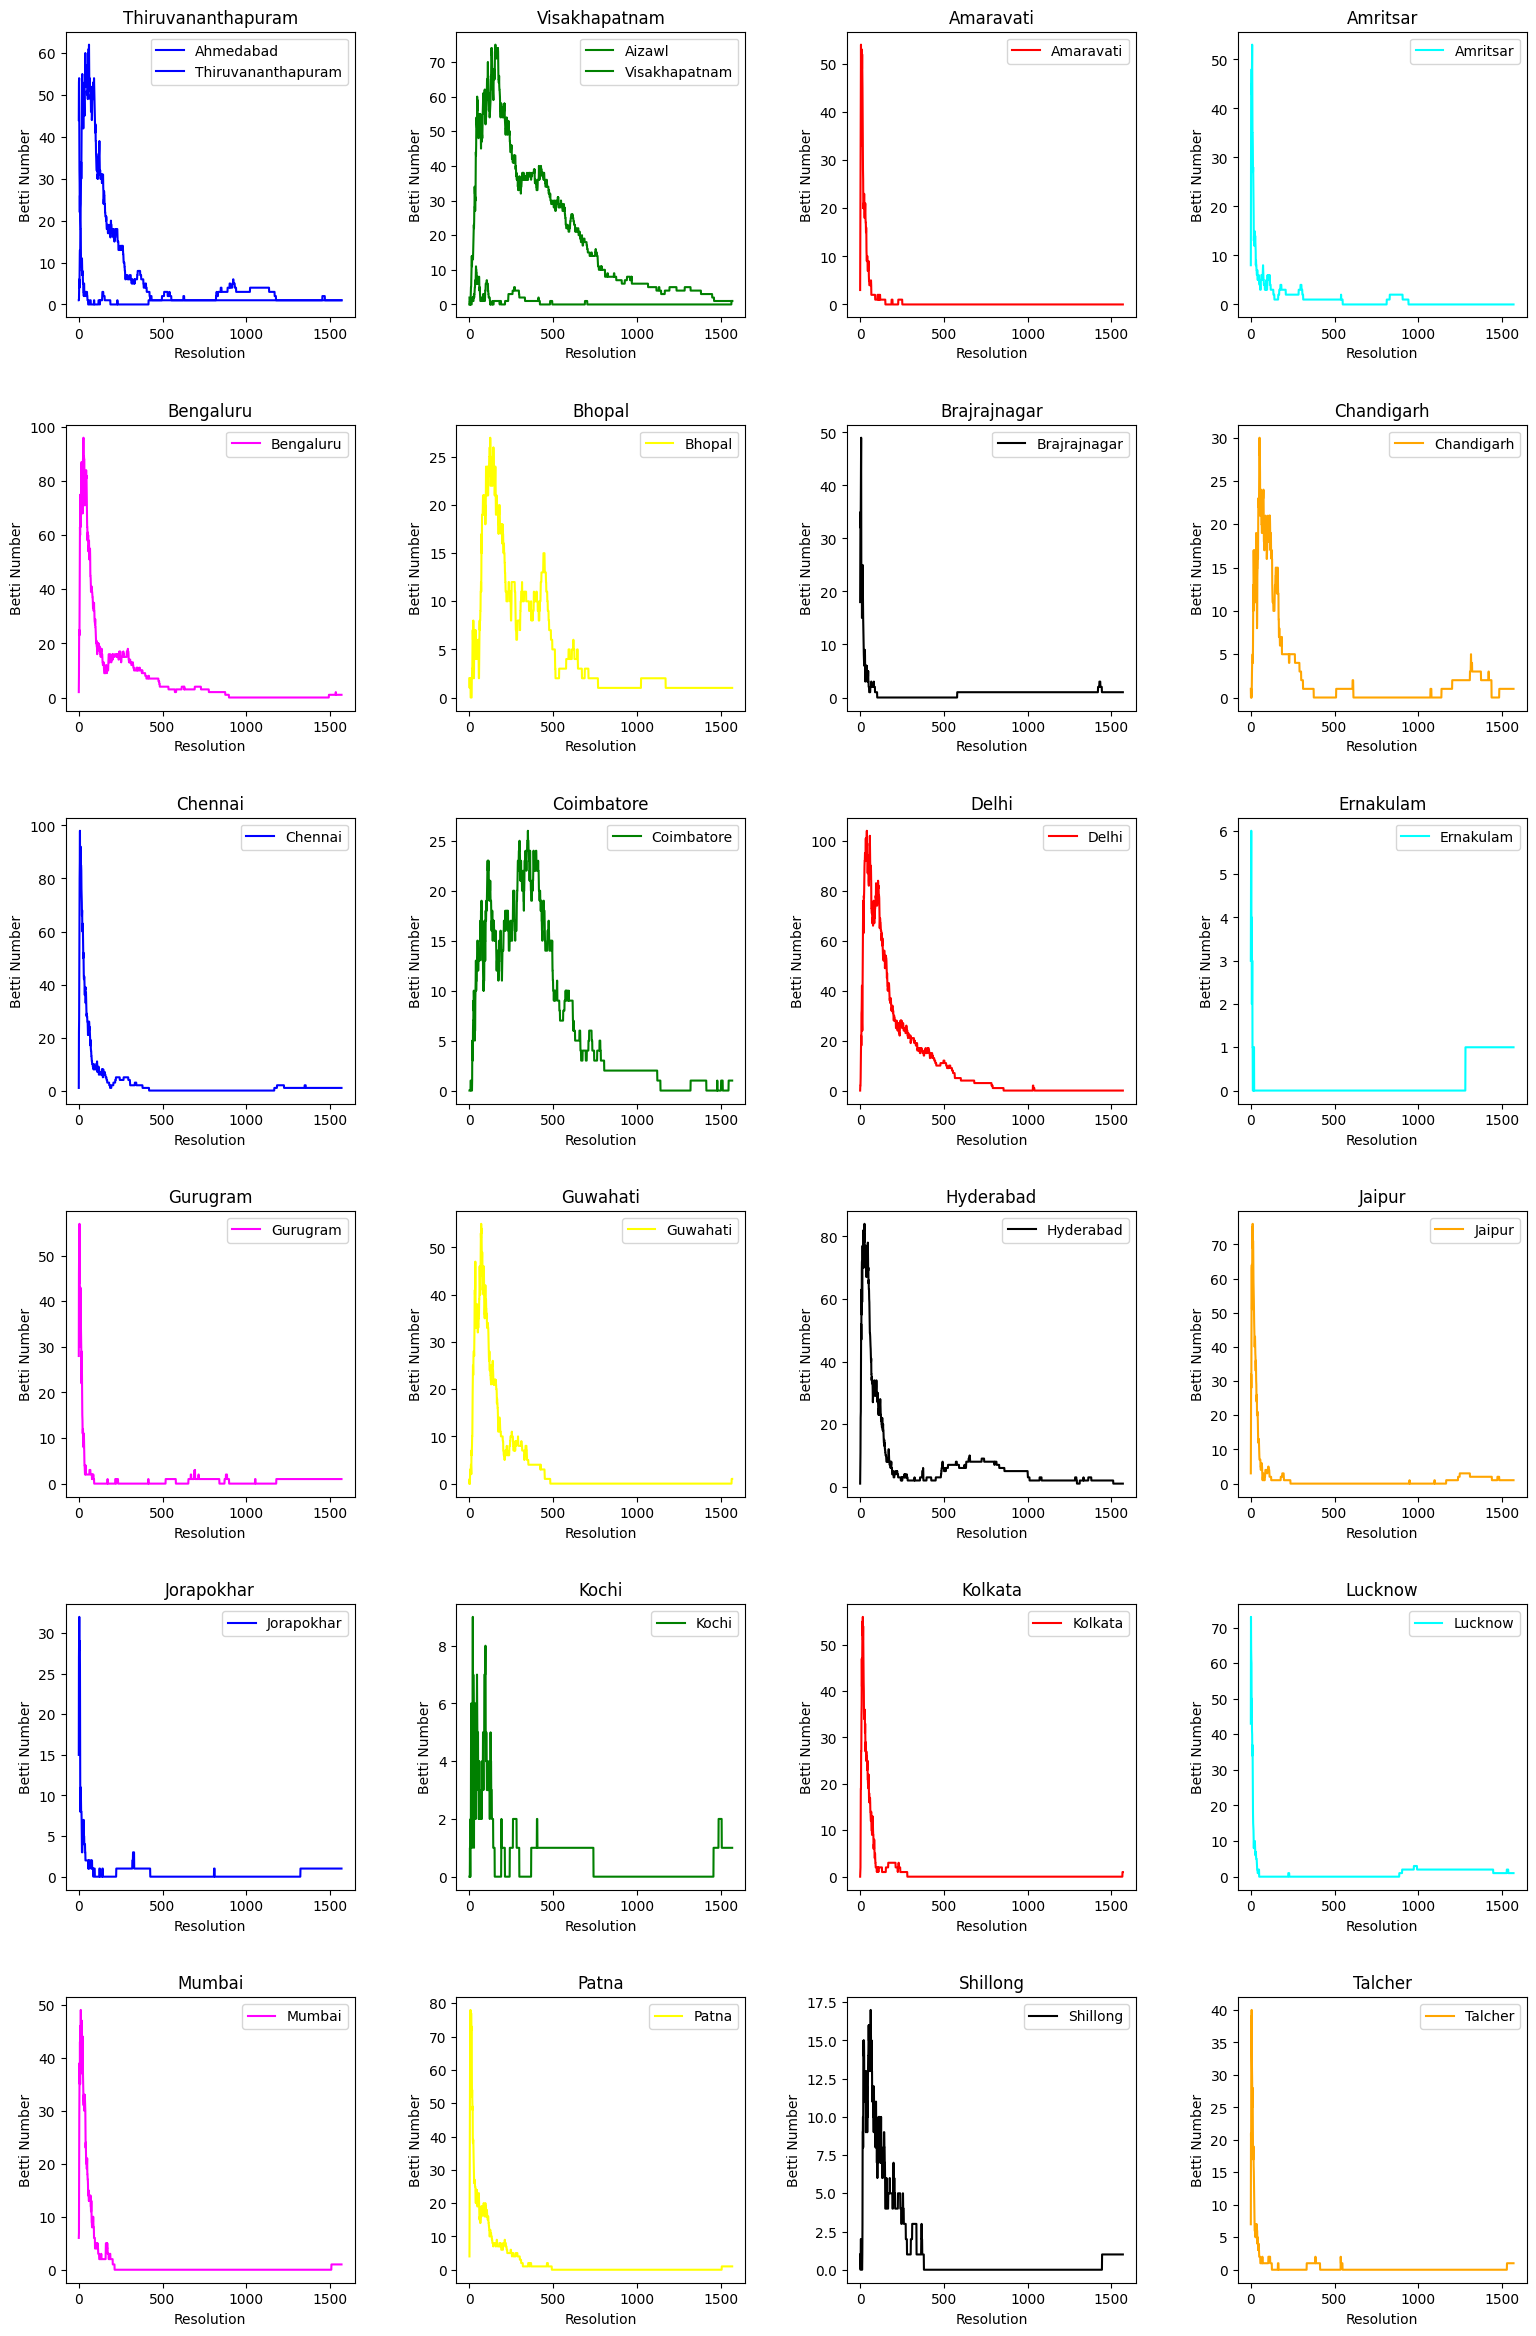

In [59]:
import matplotlib.pyplot as plt

# Define the number of rows and columns for the subplot grid
num_rows = 6
num_cols = 4

# Define the total number of subplots
total_subplots = num_rows * num_cols

# Calculate the number of cities per subplot
cities_per_subplot = len(cities) // total_subplots
remainder = len(cities) % total_subplots

# Define a list of colors for each plot
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

plt.figure(figsize=(16, 24))

for i, city in enumerate(cities):
    # Calculate the subplot position
    subplot_index = (i % total_subplots) + 1

    # Create subplots
    plt.subplot(num_rows, num_cols, subplot_index)
    plt.plot(betti_curves[i], label=city, color=colors[i % len(colors)])  # Choose color based on index
    plt.title(city)
    plt.xlabel("Resolution")
    plt.ylabel("Betti Number")
    plt.legend()

# Adjust layout
plt.tight_layout(pad=3)  # Increase spacing between subplots
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_9984\1047273806.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(wasserstein_distances_matrix, 'ward')


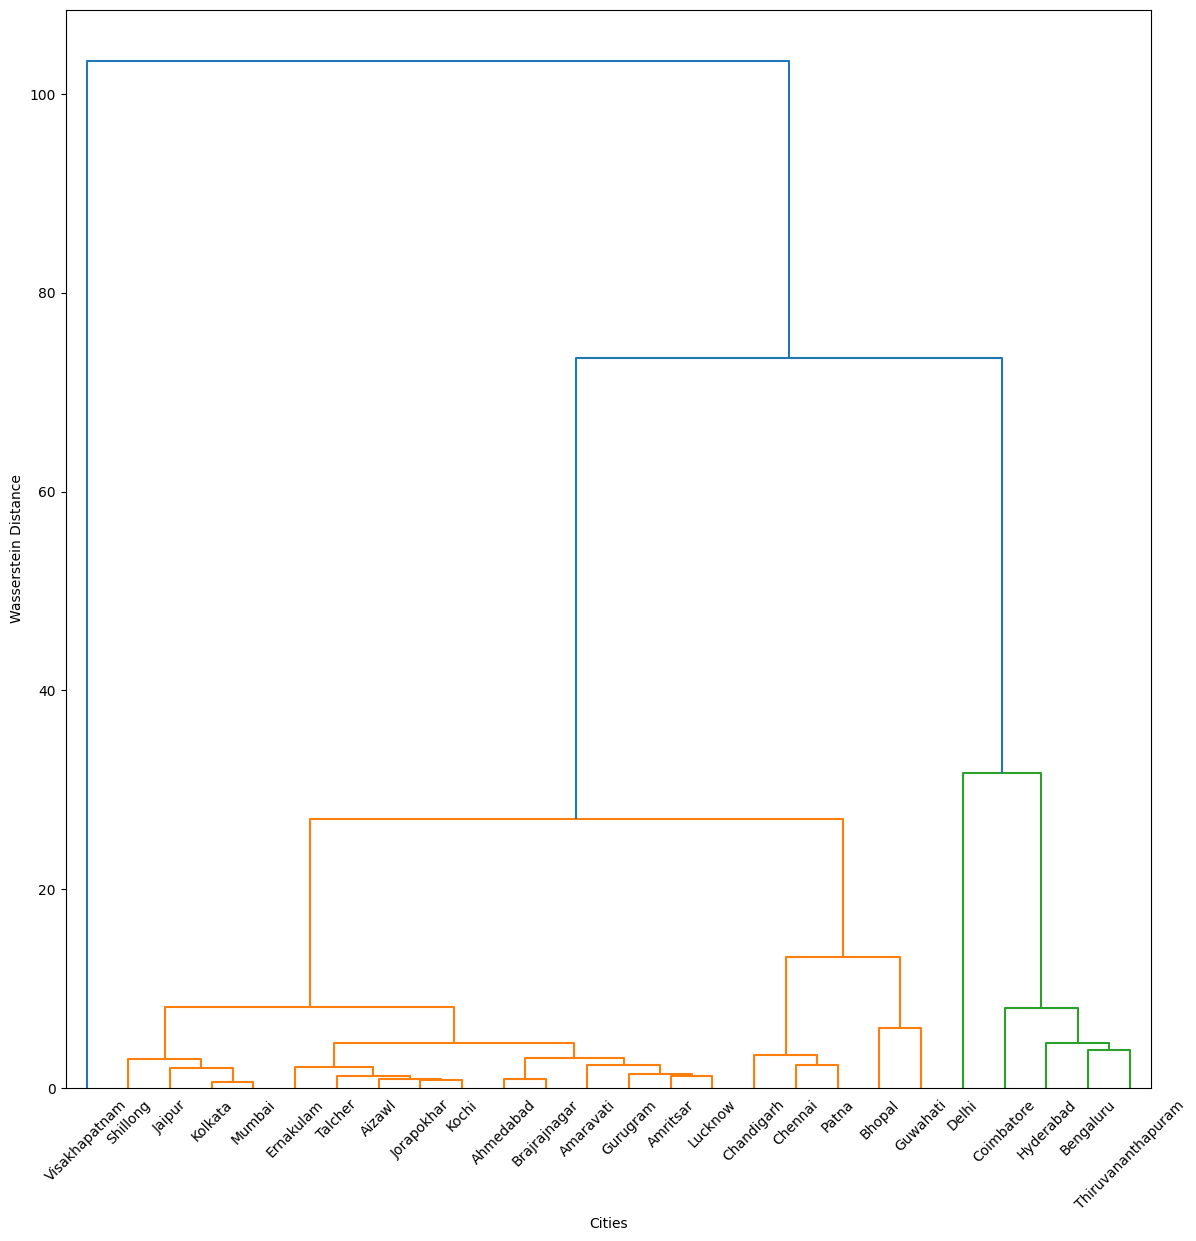

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance  # Import Wasserstein distance function

# Compute pairwise Wasserstein distances
wasserstein_distances_matrix = np.zeros((len(betti_curves), len(betti_curves)))
for i in range(len(betti_curves)):
    for j in range(i+1, len(betti_curves)):
        wasserstein_distances_matrix[i, j] = wasserstein_distance(betti_curves[i], betti_curves[j])
        wasserstein_distances_matrix[j, i] = wasserstein_distances_matrix[i, j]

# Perform hierarchical clustering
Z = linkage(wasserstein_distances_matrix, 'ward')

# Plot dendrogram
plt.figure(figsize=(14,14))
dendrogram(Z, labels=cities)
#plt.title('Hierarchical Clustering Dendrogram based on Betti Curves')
plt.xlabel('Cities')
plt.ylabel('Wasserstein Distance')
plt.show()


## Distrubution of Features

C:\Users\admin\AppData\Local\Temp\ipykernel_9984\3757495621.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[feature], ax=axes[i], shade=True, color='blue')
C:\Users\admin\AppData\Local\Temp\ipykernel_9984\3757495621.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[feature], ax=axes[i], shade=True, color='blue')
C:\Users\admin\AppData\Local\Temp\ipykernel_9984\3757495621.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[feature], ax=axes[i], shade=True, color='blue')
C:\Users\admin\AppData\Local\Temp\ipykernel_9984\3757495621.py:8: FutureWarning: 

`shade` is now deprecated in favor 

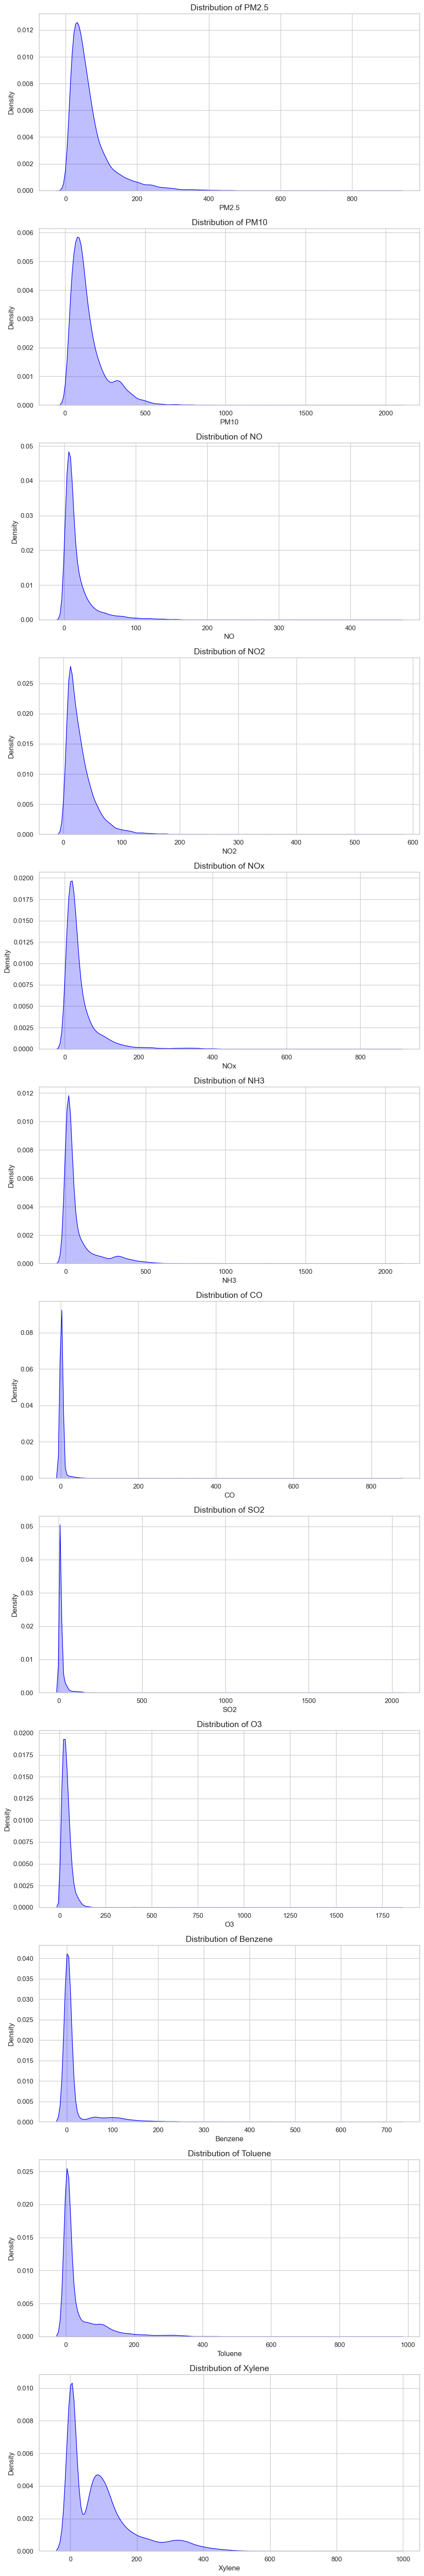

In [62]:

sns.set(style="whitegrid")
numerical_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
# Create a single subplot with multiple axes
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 5 * len(numerical_features)))

# Iterate through each numerical feature and plot its distribution
for i, feature in enumerate(numerical_features):
    sns.kdeplot(data=data[feature], ax=axes[i], shade=True, color='blue')
    axes[i].set_title(f"Distribution of {feature}", fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

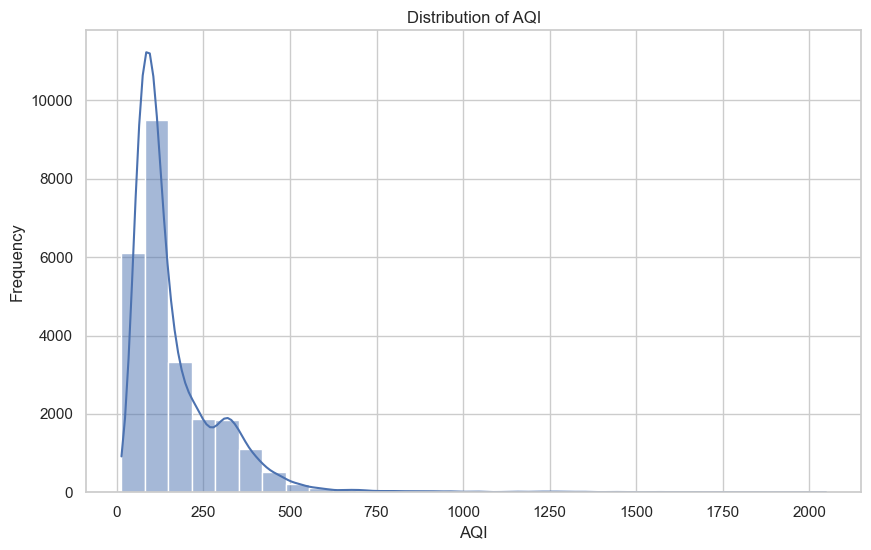

In [64]:
## Distribution of the target variable 'AQI'
plt.figure(figsize=(10, 6))
sns.histplot(data['AQI'], bins=30, kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


## Outliers

In [11]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Select numerical features for outlier detection
# numerical_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# # Box plot for outlier visualization
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=data[numerical_features])
# #plt.title('Box plot for Outlier Detection')
# plt.xlabel('Features')
# plt.ylabel('Values')
# plt.xticks(rotation=45)
# plt.show()

# # Function to detect outliers using z-score
# def detect_outliers_zscore(data):
#     outliers = []
#     threshold = 3
#     mean = np.mean(data)
#     std = np.std(data)
#     for value in data:
#         z_score = (value - mean) / std
#         if np.abs(z_score) > threshold:
#             outliers.append(value)
#     return outliers

# # Detect outliers using z-score and remove them
# cleaned_df = data.copy()  # Create a copy of the original dataframe
# for feature in numerical_features:
#     outliers = detect_outliers_zscore(cleaned_df[feature])
#     if len(outliers) > 0:
#         ##print(f"Outliers detected in {feature}: {outliers}")
#         # Remove outliers from the dataframe
#         cleaned_df = cleaned_df[~cleaned_df[feature].isin(outliers)]
#         #print(f"{len(outliers)} outliers removed from {feature}")

# # Reset index after removing rows
# cleaned_df.reset_index(drop=True, inplace=True)
# data = cleaned_df

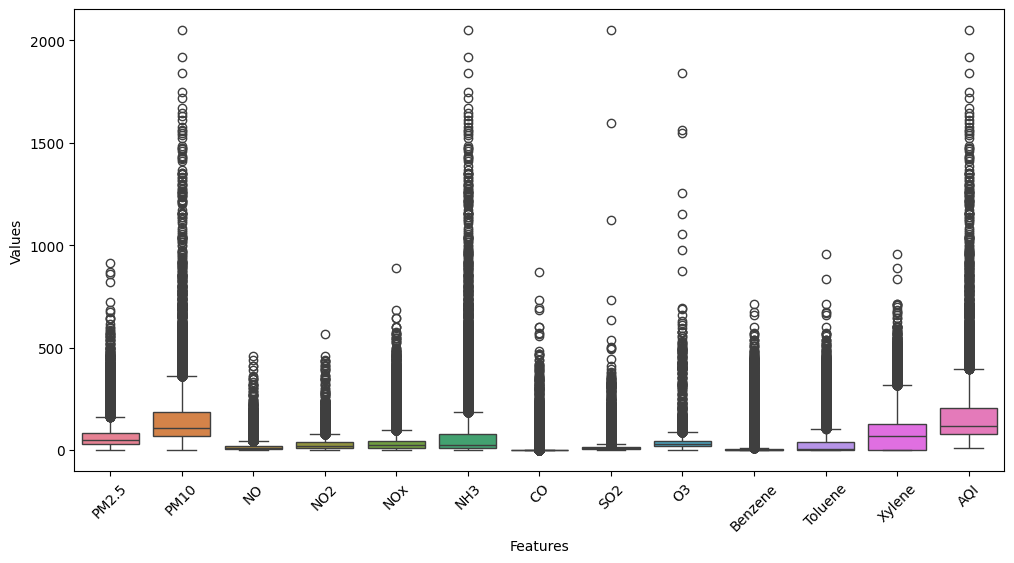

C:\Users\admin\AppData\Local\Temp\ipykernel_9472\3425007359.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data.isin(outliers)] = max_within_Q3  # Replace outliers with maximum within third quartile
C:\Users\admin\AppData\Local\Temp\ipykernel_9472\3425007359.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data.isin(outliers)] = max_within_Q3  # Replace outliers with maximum within third quartile
C:\Users\admin\AppData\Local\Temp\ipykernel_9472\3425007359.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features for outlier detection
numerical_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene','AQI']

# Box plot for outlier visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_features])
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Function to detect outliers using z-score
def detect_outliers_zscore(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for value in data:
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(value)
    return outliers

# Function to replace outliers with maximum point within third quartile values
def replace_outliers_with_max(data, outliers):
    Q3 = np.percentile(data, 75)  # Third quartile value
    max_within_Q3 = np.max(data[data <= Q3])  # Maximum value within third quartile
    data[data.isin(outliers)] = max_within_Q3  # Replace outliers with maximum within third quartile

# Detect outliers using z-score and replace them with maximum within third quartile
cleaned_df = data.copy()  # Create a copy of the original dataframe
for feature in numerical_features:
    outliers = detect_outliers_zscore(cleaned_df[feature])
    if len(outliers) > 0:
        # Replace outliers with maximum within third quartile
        replace_outliers_with_max(cleaned_df[feature], outliers)

# Reset index after replacing outliers
cleaned_df.reset_index(drop=True, inplace=True)
data = cleaned_df


In [13]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,29-01-2015,83.13,209.00,6.93,28.71,33.72,209.00,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,Ahmedabad,30-01-2015,79.84,328.00,13.85,28.68,41.08,328.00,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,Ahmedabad,31-01-2015,94.52,514.00,24.39,32.66,52.61,514.00,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,Ahmedabad,01-02-2015,135.99,185.48,43.48,42.08,84.57,81.00,43.48,75.23,102.70,0.40,0.04,25.87,208.0,Severe
4,Ahmedabad,02-02-2015,178.33,185.48,54.56,35.31,72.80,81.00,54.56,55.04,107.38,0.46,0.06,35.61,208.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
24846,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
24847,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
24848,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


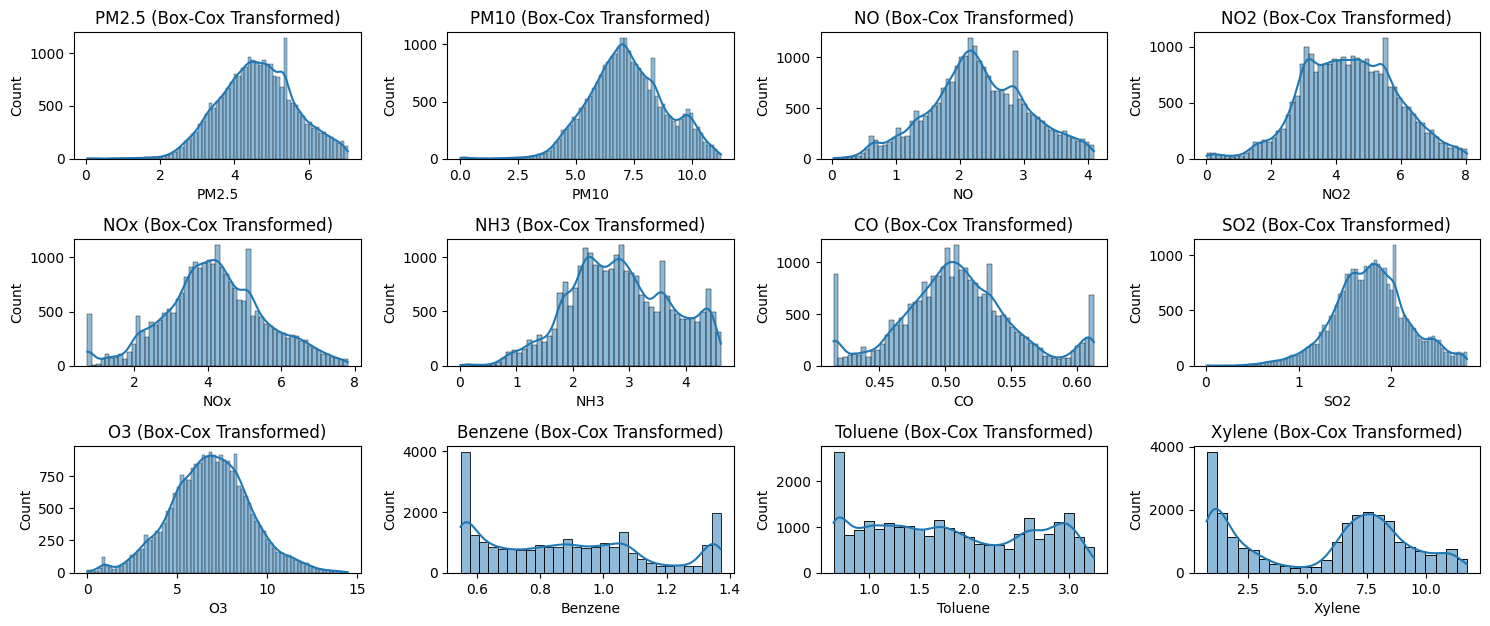

In [14]:
from scipy.stats import boxcox

# List of numerical features
numerical_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Perform Box-Cox transformation for each numerical feature
for feature in numerical_features:
    # Add a constant value to handle non-positive values
    constant = data[feature].min() - 1 if data[feature].min() <= 0 else 0
    transformed_feature, _ = boxcox(data[feature].dropna() + 1 - constant)
    # Replace original feature values with transformed values in the DataFrame
    data[feature] = transformed_feature
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)  # Adjusted to create 12 subplots in a 3x4 grid
    sns.histplot(data[feature], kde=True)
    plt.title(f'{feature} (Box-Cox Transformed)')
plt.tight_layout()  # Adjust subplot parameters to give more space between subplots
plt.show()


## Correlation

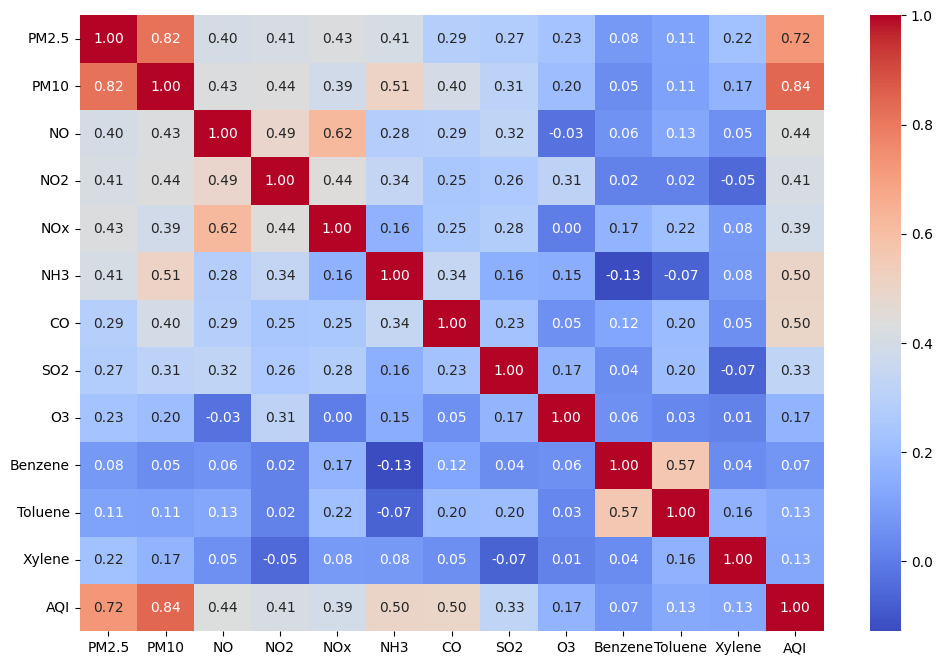

In [15]:
import pandas as pd

# Convert NumPy array back to a pandas DataFrame

# Calculate correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()
# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Matrix')
plt.show()


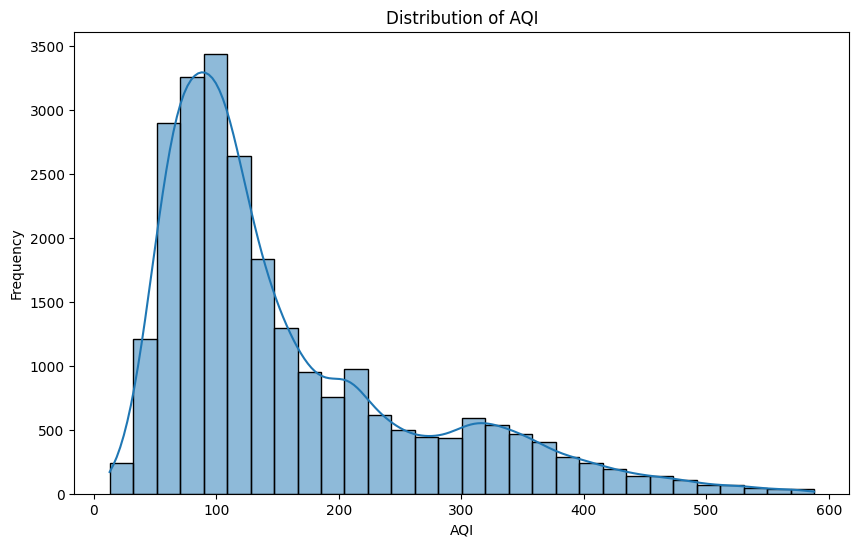

In [16]:
## Distribution of the target variable 'AQI'
plt.figure(figsize=(10, 6))
sns.histplot(data['AQI'], bins=30, kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

## Time Series Analysis:

Time series analysis to understand how air pollution levels change over time.
Plot the AQI values over time to identify any trends, seasonality, or patterns
python code for this

C:\Users\admin\AppData\Local\Temp\ipykernel_9472\3276075841.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


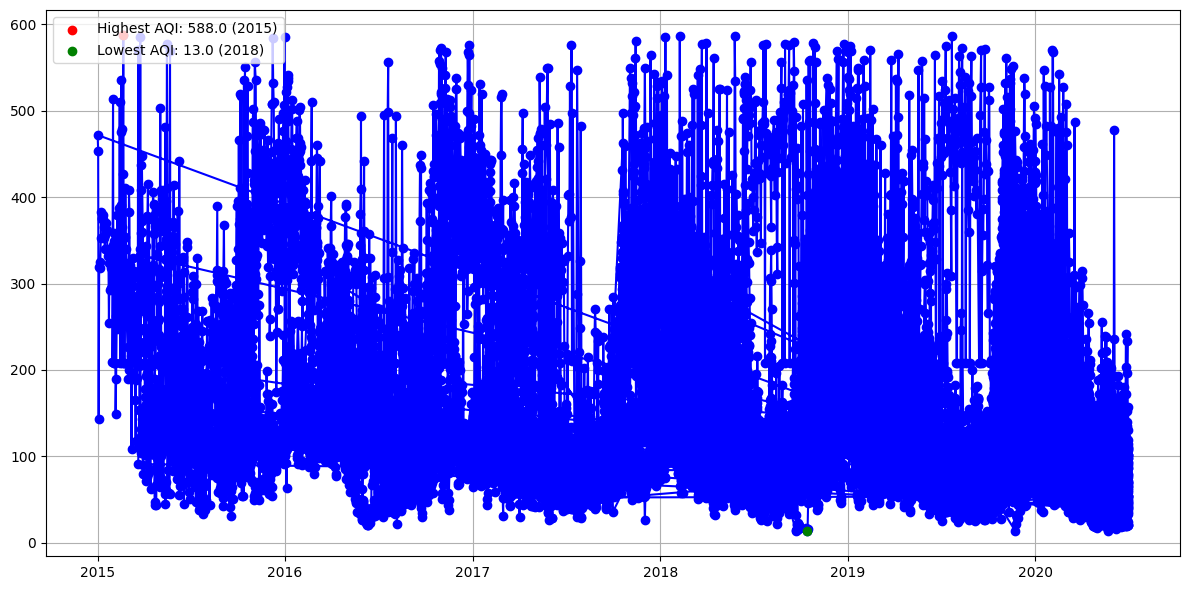

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Find the highest and lowest AQI values and their corresponding dates
max_aqi_date = data.loc[data['AQI'].idxmax(), 'Date']
max_aqi_value = data['AQI'].max()
min_aqi_date = data.loc[data['AQI'].idxmin(), 'Date']
min_aqi_value = data['AQI'].min()

# Extracting years from dates
max_year = max_aqi_date.year
min_year = min_aqi_date.year

# Plot AQI values over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['AQI'], color='blue', marker='o', linestyle='-')
plt.scatter(max_aqi_date, max_aqi_value, color='red', label=f'Highest AQI: {max_aqi_value} ({max_year})', zorder=5)  # Plot highest point
plt.scatter(min_aqi_date, min_aqi_value, color='green', label=f'Lowest AQI: {min_aqi_value} ({min_year})', zorder=5)  # Plot lowest point
plt.grid(True)
plt.tight_layout()
plt.legend()  # Show legend
plt.show()


# Modeling
## Classification
###  XGBOOST, CAT BOOST, LIGHT GBM, RANDOM FOREST AND SVM

In [19]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE

# Load dataset
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
target = ['AQI_Bucket']

# Assuming 'data' is your dataset
X = data[features]
y = data[target]

# Encode target classes
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize classifiers
classifiers = {
    "CatBoost": CatBoostClassifier(verbose=0),
    "XGBoost": XGBClassifier(),
     "LightGBM": LGBMClassifier(),
     "Naive Bayes": GaussianNB(),
     "SVM": SVC(kernel='linear', C=1)
 }

# Initialize results dictionaries
results_cv = {}
results_test = {}

# Perform cross-validation and evaluate classifiers
for name, clf in classifiers.items():
    # Perform cross-validation
    cv_accuracy = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy').mean()
    cv_precision = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5, scoring='precision_macro').mean()
    cv_recall = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5, scoring='recall_macro').mean()
    cv_f1 = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5, scoring='f1_macro').mean()
    results_cv[name] = {'Accuracy': cv_accuracy, 'Precision': cv_precision, 'Recall': cv_recall, 'F1 Score': cv_f1}
    
    # Train and evaluate on test set
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred, average='macro')
    test_recall = recall_score(y_test, y_pred, average='macro')
    test_f1 = f1_score(y_test, y_pred, average='macro')
    results_test[name] = {'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall, 'F1 Score': test_f1}

# Print cross-validation results
print("Cross-Validation Results:")
for name, metrics in results_cv.items():
    print(f"{name}: {metrics}")

# Print test results+
print("\nTest Results:")
for name, metrics in results_test.items():
    print(f"{name}: {metrics}")


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 29572, number of used features: 12
[LightGBM] [Info] Start training from score -1.791692
[LightGBM] [Info] Start training from score -1.791692
[LightGBM] [Info] Start training from score -1.791692
[LightGBM] [Info] Start training from score -1.791692
[LightGBM] [Info] Start training from score -1.791895
[LightGBM] [Info] Start training from score -1.791895
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 29573, number of used features: 12
[LightGBM] [Info] Start training from score -1.791726
[LightGBM] [Info] Start training from score 

## Regression

### Train-Test Split

In [46]:
from sklearn.model_selection import train_test_split
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
target = 'AQI'

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.3, random_state=42)


min_aqi = data[target].min()
max_aqi = data[target].max()
y_train1 = ( y_train - min_aqi) / (max_aqi - min_aqi)
y_test1 = ( y_test - min_aqi) / (max_aqi - min_aqi)

### XGBOOST

In [47]:
import pandas as pd

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Define features and target variable


# Initialize XGBoost regressor
xgb_model = XGBRegressor()

# Train the model
xgb_model.fit(X_train, y_train1)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Manual anti-normalization for predicted AQI values
anti_aqi_pred = y_pred * (max_aqi - min_aqi) + min_aqi

mae = mean_absolute_error(y_test1, y_pred)  # Specify the column name for the 'AQI' target variable
mse = mean_squared_error(y_test1, y_pred)
rms = np.sqrt(mse)
r_squared = r2_score(y_test1, y_pred)
print("Test set Results")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rms)
print("R-squared:", r_squared)
# Print a few examples of actual and predicted AQI values
print("Actual AQI Values vs Predicted AQI Values:")
for actual, predicted in zip(y_test[:5], anti_aqi_pred[:5]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Test set Results
Mean Absolute Error: 0.017359838228614626
Mean Squared Error: 0.0019185430953122654
Root Mean Squared Error: 0.04380117687131552
R-squared: 0.945137041601062
Actual AQI Values vs Predicted AQI Values:
Actual: 141.0, Predicted: 137.43035888671875
Actual: 209.0, Predicted: 205.42572021484375
Actual: 111.0, Predicted: 118.46430969238281
Actual: 124.0, Predicted: 126.2294692993164
Actual: 81.0, Predicted: 78.60441589355469


In [48]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_train)

# Manual anti-normalization for predicted AQI values
anti_aqi_pred = y_pred * (max_aqi - min_aqi) + min_aqi

mae = mean_absolute_error(y_train1, y_pred)  # Specify the column name for the 'AQI' target variable
mse = mean_squared_error(y_train1, y_pred)
rms = np.sqrt(mse)
r_squared = r2_score(y_train1, y_pred)
print("Train set Results")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rms)
print("R-squared:", r_squared)
# Print a few examples of actual and predicted AQI values
print("Actual AQI Values vs Predicted AQI Values:")
for actual, predicted in zip(y_train[:5], anti_aqi_pred[:5]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Train set Results
Mean Absolute Error: 0.009067980473924193
Mean Squared Error: 0.00024368525023085147
Root Mean Squared Error: 0.015610421206067806
R-squared: 0.9930468416523744
Actual AQI Values vs Predicted AQI Values:
Actual: 322.0, Predicted: 323.6860656738281
Actual: 92.0, Predicted: 95.22329711914062
Actual: 54.0, Predicted: 54.634769439697266
Actual: 101.0, Predicted: 101.54901123046875
Actual: 228.0, Predicted: 215.1069793701172


### LSTM

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow import keras

import numpy as np
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(25))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(X_train, y_train1, batch_size=32, epochs=100, validation_data=(X_test, y_test1))

# Evaluate the model
score = model_lstm.evaluate(X_test, y_test1)
print("Test loss:", score)

# Make predictions
predictions_lstm = model_lstm.predict(X_test)

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 0.0099 - val_loss: 0.0028
Epoch 2/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 3/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0026 - val_loss: 0.0036
Epoch 4/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 5/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 6/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 7/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 8/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 9/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 10/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 11/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 12/100
432/432 ━━━━━━━━

In [19]:
# Manual anti-normalization for predicted AQI values
anti_aqi_pred = predictions_lstm * (max_aqi - min_aqi) + min_aqi

mae = mean_absolute_error(y_test1, predictions_lstm)  # Specify the column name for the 'AQI' target variable
mse = mean_squared_error(y_test1, predictions_lstm)
rms = np.sqrt(mse)
r_squared = r2_score(y_test1, predictions_lstm)
print("Test set Results")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rms)
print("R-squared:", r_squared)
# Print a few examples of actual and predicted AQI values
print("Actual AQI Values vs Predicted AQI Values:")
for actual, predicted in zip(y_test[:5], anti_aqi_pred[:5]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Test set Results
Mean Absolute Error: 0.012479453429290749
Mean Squared Error: 0.000752893294885589
Root Mean Squared Error: 0.02743890112387136
R-squared: 0.9610258167496538
Actual AQI Values vs Predicted AQI Values:
Actual: 184.0, Predicted: [185.31659]
Actual: 79.0, Predicted: [77.131714]
Actual: 197.0, Predicted: [167.68733]
Actual: 305.0, Predicted: [319.39496]
Actual: 52.0, Predicted: [52.355576]


In [20]:
# Make predictions on the train set
# Make predictions
predictions_train = model_lstm.predict(X_train)
# Manual anti-normalization for predicted AQI values
anti_aqi_pred = predictions_train * (max_aqi - min_aqi) + min_aqi

mae = mean_absolute_error(y_train1, predictions_train)  # Specify the column name for the 'AQI' target variable
mse = mean_squared_error(y_train1, predictions_train)
rms = np.sqrt(mse)
r_squared = r2_score(y_train1, predictions_train)
print("Train set Results")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rms)
print("R-squared:", r_squared)
# Print a few examples of actual and predicted AQI values
print("Actual AQI Values vs Predicted AQI Values:")
for actual, predicted in zip(y_test[:5], anti_aqi_pred[:5]):
    print(f"Actual: {actual}, Predicted: {predicted}")


432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Train set Results
Mean Absolute Error: 0.011422227739533684
Mean Squared Error: 0.0005402760026865595
Root Mean Squared Error: 0.023243837950875486
R-squared: 0.9716533584530083
Actual AQI Values vs Predicted AQI Values:
Actual: 184.0, Predicted: [99.717964]
Actual: 79.0, Predicted: [84.415344]
Actual: 197.0, Predicted: [131.66467]
Actual: 305.0, Predicted: [221.70407]
Actual: 52.0, Predicted: [138.12314]


### CAT BOOST MODEL

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
# Initialize CatBoost regressor
from sklearn.model_selection import train_test_split
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
target = 'AQI'

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.3, random_state=42)


min_aqi = data[target].min()
max_aqi = data[target].max()
y_train1 = ( y_train - min_aqi) / (max_aqi - min_aqi)
y_test1 = ( y_test - min_aqi) / (max_aqi - min_aqi)
catboost_model = CatBoostRegressor()

# Train the model
catboost_model.fit(X_train, y_train1, verbose=False)

# Make predictions on the test set
y_pred= catboost_model.predict(X_test)

# Manual anti-normalization for predicted AQI values
anti_aqi_pred = y_pred * (max_aqi - min_aqi) + min_aqi

mae = mean_absolute_error(y_test1, y_pred)  # Specify the column name for the 'AQI' target variable
mse = mean_squared_error(y_test1, y_pred)
rms = np.sqrt(mse)
r_squared = r2_score(y_test1, y_pred)
print("Test set Results")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rms)
print("R-squared:", r_squared)
# Print a few examples of actual and predicted AQI values
print("Actual AQI Values vs Predicted AQI Values:")
for actual, predicted in zip(y_test[:5], anti_aqi_pred[:5]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Test set Results
Mean Absolute Error: 0.015336068028285051
Mean Squared Error: 0.00161268996627575
Root Mean Squared Error: 0.04015831129760999
R-squared: 0.9538832655120679
Actual AQI Values vs Predicted AQI Values:
Actual: 141.0, Predicted: 140.69101076603937
Actual: 209.0, Predicted: 207.66394243240418
Actual: 111.0, Predicted: 120.20977711891973
Actual: 124.0, Predicted: 123.8223226805845
Actual: 81.0, Predicted: 78.92248708496324


In [24]:
# Make predictions on the train set
y_pred= catboost_model.predict(X_train)

# Manual anti-normalization for predicted AQI values
anti_aqi_pred = y_pred * (max_aqi - min_aqi) + min_aqi

mae = mean_absolute_error(y_train1, y_pred)  # Specify the column name for the 'AQI' target variable
mse = mean_squared_error(y_train1, y_pred)
rms = np.sqrt(mse)
r_squared = r2_score(y_train1, y_pred)
print("Train set Results")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rms)
print("R-squared:", r_squared)
# Print a few examples of actual and predicted AQI values
print("Actual AQI Values vs Predicted AQI Values:")
for actual, predicted in zip(y_train[:5], anti_aqi_pred[:5]):
    print(f"Actual: {actual}, Predicted: {predicted}")

Train set Results
Mean Absolute Error: 0.011208997740656465
Mean Squared Error: 0.000500845829354916
Root Mean Squared Error: 0.02237958510238552
R-squared: 0.985709186928821
Actual AQI Values vs Predicted AQI Values:
Actual: 322.0, Predicted: 321.2899771466359
Actual: 92.0, Predicted: 97.83680521872306
Actual: 54.0, Predicted: 60.36835938874496
Actual: 101.0, Predicted: 100.80333130263863
Actual: 228.0, Predicted: 205.70242882932646


### GRU

In [26]:
from keras.layers import GRU
import numpy as np
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
X_train_gru = X_train_np.reshape((X_train_np.shape[0], 1, X_train_np.shape[1]))
X_test_gru = X_test_np.reshape((X_test_np.shape[0], 1, X_test_np.shape[1]))

# Build GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(1, len(features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_gru, y_train1, epochs=100, batch_size=32, verbose=0)

# Make predictions
y_pred = model.predict(X_test_gru)
y_pred = y_pred.reshape(-1)

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [27]:
# Manual anti-normalization for predicted AQI values
anti_aqi_pred = y_pred * (max_aqi - min_aqi) + min_aqi

mae = mean_absolute_error(y_test1, y_pred)  # Specify the column name for the 'AQI' target variable
mse = mean_squared_error(y_test1, y_pred)
rms = np.sqrt(mse)
r_squared = r2_score(y_test1, y_pred)
print("Test set Results")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rms)
print("R-squared:", r_squared)
# Print a few examples of actual and predicted AQI values
print("Actual AQI Values vs Predicted AQI Values:")
for actual, predicted in zip(y_test[:5], anti_aqi_pred[:5]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Test set Results
Mean Absolute Error: 0.017228487356999344
Mean Squared Error: 0.001074329535069623
Root Mean Squared Error: 0.0327769665324542
R-squared: 0.9443863872138409
Actual AQI Values vs Predicted AQI Values:
Actual: 184.0, Predicted: 169.24533081054688
Actual: 79.0, Predicted: 72.50172424316406
Actual: 197.0, Predicted: 152.54005432128906
Actual: 305.0, Predicted: 296.59344482421875
Actual: 52.0, Predicted: 42.53948974609375


In [28]:
# Make predictions
y_pred = model.predict(X_train_gru)
y_pred = y_pred.reshape(-1)
# Manual anti-normalization for predicted AQI values
anti_aqi_pred = y_pred * (max_aqi - min_aqi) + min_aqi

mae = mean_absolute_error(y_train1, y_pred)  # Specify the column name for the 'AQI' target variable
mse = mean_squared_error(y_train1, y_pred)
rms = np.sqrt(mse)
r_squared = r2_score(y_train1, y_pred)
print("Train set Results")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rms)
print("R-squared:", r_squared)
# Print a few examples of actual and predicted AQI values
print("Actual AQI Values vs Predicted AQI Values:")
for actual, predicted in zip(y_train[:5], anti_aqi_pred[:5]):
    print(f"Actual: {actual}, Predicted: {predicted}")


432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Train set Results
Mean Absolute Error: 0.017186891566033122
Mean Squared Error: 0.0009913088604247
Root Mean Squared Error: 0.031485057732592775
R-squared: 0.947989033773321
Actual AQI Values vs Predicted AQI Values:
Actual: 100.0, Predicted: 95.80839538574219
Actual: 81.0, Predicted: 75.33747863769531
Actual: 134.0, Predicted: 134.1043701171875
Actual: 218.0, Predicted: 220.84092712402344
Actual: 138.0, Predicted: 137.03341674804688


### LIGHT GBM

In [25]:
from lightgbm import LGBMRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize LightGBM regressor
lgbm_model = LGBMRegressor()

# Train the model
lgbm_model.fit(X_train, y_train1)

# Make predictions on the test set
y_pred = lgbm_model.predict(X_test)

# Manual anti-normalization for predicted AQI values
anti_aqi_pred = y_pred * (max_aqi - min_aqi) + min_aqi

mae = mean_absolute_error(y_test1, y_pred)  # Specify the column name for the 'AQI' target variable
mse = mean_squared_error(y_test1, y_pred)
rms = np.sqrt(mse)
r_squared = r2_score(y_test1, y_pred)
print("Test set Results")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rms)
print("R-squared:", r_squared)
# Print a few examples of actual and predicted AQI values
print("Actual AQI Values vs Predicted AQI Values:")
for actual, predicted in zip(y_test[:5], anti_aqi_pred[:5]):
    print(f"Actual: {actual}, Predicted: {predicted}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 17395, number of used features: 12
[LightGBM] [Info] Start training from score 0.251870
Test set Results
Mean Absolute Error: 0.016492289493703478
Mean Squared Error: 0.0016493995443054028
Root Mean Squared Error: 0.04061280025195754
R-squared: 0.9528335126776362
Actual AQI Values vs Predicted AQI Values:
Actual: 141.0, Predicted: 138.65871717041122
Actual: 209.0, Predicted: 207.70629080226172
Actual: 111.0, Predicted: 116.53229010267592
Actual: 124.0, Predicted: 124.9645990705939
Actual: 81.0, Predicted: 81.27589040735994


In [26]:
# Make predictions on the train set
y_pred = lgbm_model.predict(X_train)

# Manual anti-normalization for predicted AQI values
anti_aqi_pred = y_pred * (max_aqi - min_aqi) + min_aqi

mae = mean_absolute_error(y_train1, y_pred)  # Specify the column name for the 'AQI' target variable
mse = mean_squared_error(y_train1, y_pred)
rms = np.sqrt(mse)
r_squared = r2_score(y_train1, y_pred)
print("Train set Results")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rms)
print("R-squared:", r_squared)
# Print a few examples of actual and predicted AQI values
print("Actual AQI Values vs Predicted AQI Values:")
for actual, predicted in zip(y_train[:5], anti_aqi_pred[:5]):
    print(f"Actual: {actual}, Predicted: {predicted}")

Train set Results
Mean Absolute Error: 0.012945647226422977
Mean Squared Error: 0.0007506973305646219
Root Mean Squared Error: 0.027398856373298173
R-squared: 0.9785800847379528
Actual AQI Values vs Predicted AQI Values:
Actual: 322.0, Predicted: 320.60836586861615
Actual: 92.0, Predicted: 95.3582051129345
Actual: 54.0, Predicted: 61.99270718736841
Actual: 101.0, Predicted: 101.29033550993888
Actual: 228.0, Predicted: 213.72988951185536
